# QC Flag Check of The UKB Metabolomics Dataset
Nightingale documentation of the QC flags: https://biobank.ndph.ox.ac.uk/ukb/ukb/docs/nmrm_app4.pdf

In [1]:
# Import libraries and dataset
import pandas as pd
import numpy as np

path = <file path>
data = pd.read_table(path, compression = "gzip", low_memory = True)

/mnt/scratch/tmp/wb_agarham/ipykernel_32118/2845761725.py:6: DtypeWarning: Columns (4,34,35,36,37,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1416,1417,1418,1419,1420,1421,1422,14

## Check for any multiple QC flags for a single metabolite value
For most of the metabolite values, only 1 QC flag assigned. 
However there are 2 metabolites with multiple QC flags - bOHbutyrate and creatinine. 
The number of multiple QC flags are very low.

In [2]:
# Separating QC flag data
met_qc_ids = pd.read_csv('qc_field_ids.csv')

qc_ids_initials = list(map(lambda x: 'f.' + str(x) + '.0', met_qc_ids['qc_id']))

In [3]:
# Checking metabolites with multiple QC flags
qc_col = [col for col in data.columns if col.startswith(tuple(qc_ids_initials))]
qc_col_notinit = [col for col in qc_col if not col.endswith('.0')]
qc_col_notinit

['f.23774.0.1', 'f.23774.0.2', 'f.23778.0.1']

In [4]:
# Check the number of the additional QC flags

print('bOHbutyrate:')
print(data['f.23774.0.0'].value_counts())
print(data['f.23774.0.1'].value_counts())
print(data['f.23774.0.2'].value_counts())

print('creatinine:')
print(data['f.23778.0.0'].value_counts())
print(data['f.23778.0.1'].value_counts())

bOHbutyrate:
f.23774.0.0
7.0     18576
1.0       881
4.0        36
5.0         6
10.0        1
Name: count, dtype: int64
f.23774.0.1
1.0    97
7.0    54
4.0    39
Name: count, dtype: int64
f.23774.0.2
1.0    1
Name: count, dtype: int64
creatinine:
f.23778.0.0
5.0    13889
8.0        6
9.0        2
Name: count, dtype: int64
f.23778.0.1
5.0    5
8.0    5
Name: count, dtype: int64


<Axes: >

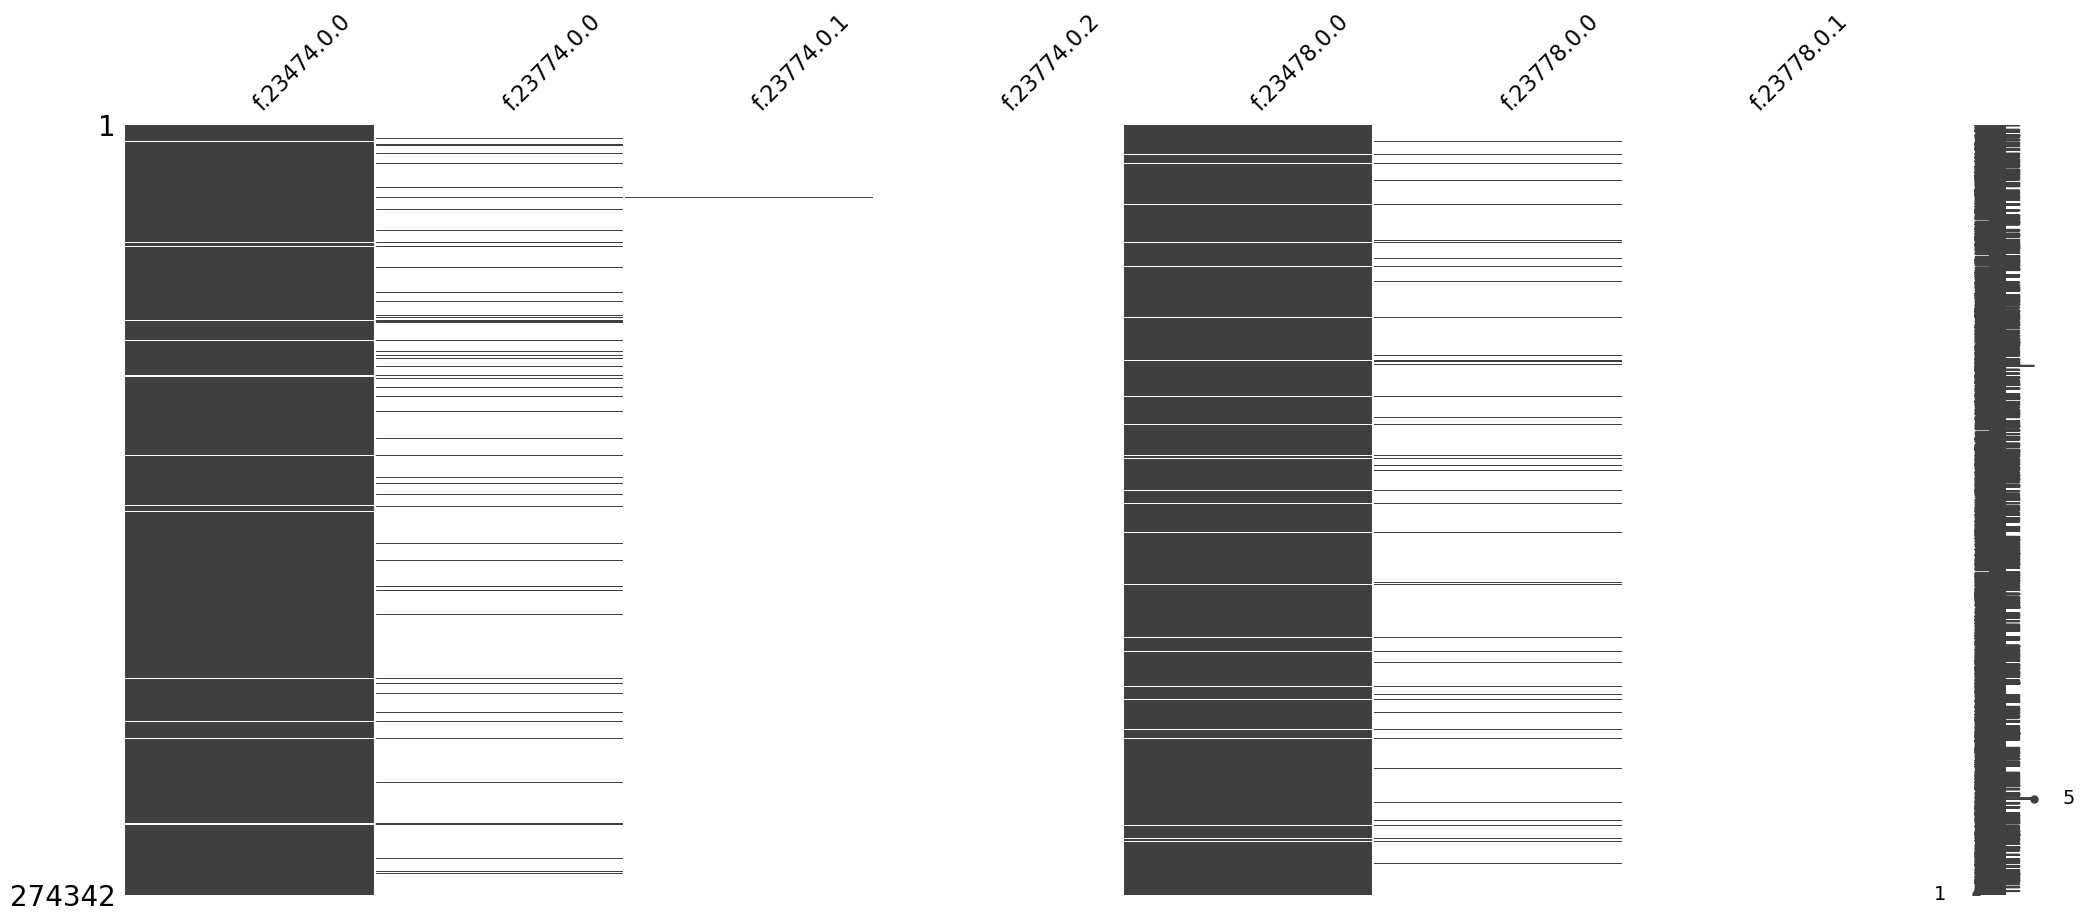

In [5]:
import missingno as msno

# Check the distribution of the additional QC flags
qc_col_multi = ['f.23474.0.0', # bOHbutyrate metabolic values
                'f.23774.0.0', # bOHbutyrate QC flags - first input
                'f.23774.0.1', # bOHbutyrate QC flags - second input
                'f.23774.0.2', # bOHbutyrate QC flags - third input
                'f.23478.0.0', # creatinine metabolic values
                'f.23778.0.0', # creatinine QC flags - first input
                'f.23778.0.1' # creatinine QC flags - second input
               ]

qc_multi = data[qc_col_multi].dropna(thresh = 1)

msno.matrix(qc_multi)

## Summarizing the number of QC flags among missing and non-missing metabolite values

In [6]:
# Separating metabolomics data and QC flag data
met_qc_ids = pd.read_csv('qc_field_ids2.csv')

met_col = list(met_qc_ids['met_id'])
qc_col = list(met_qc_ids['qc_id'])

# Creating a list containing metabolites with QC flag data
qc_col2 = list(set(qc_col) & set(list(data.columns)))
print('metabolites with QC flags: ' + str(len(qc_col2)))

met_df = data[['f.eid'] + met_col] # adding participant id (eid to the dataset)
qc_df = data[['f.eid'] + qc_col2] # adding participant id (eid to the dataset)

print('met_df shape: ' + str(met_df.shape))
print('qc_df shape: ' + str(qc_df.shape))

metabolites with QC flags: 171
met_df shape: (502355, 250)
qc_df shape: (502355, 172)


In [7]:
# Changing the column name of field ids with metabolite name
met_codes = dict(zip(met_qc_ids.met_id, met_qc_ids.abbreviation))
qc_codes = dict(zip(met_qc_ids.qc_id, met_qc_ids.abbreviation))

met_df.columns = list((pd.Series(met_df.columns)).map(met_codes))
qc_df.columns = list((pd.Series(qc_df.columns)).map(qc_codes))

met_df = met_df.rename(columns = {np.nan:'f.eid'})
qc_df = qc_df.rename(columns = {np.nan:'f.eid'})

# Set participant id as the row index
met_df = met_df.set_index('f.eid')
qc_df = qc_df.set_index('f.eid')

In [8]:
# Count QC flags for missing values
met_miss = met_df.dropna(thresh = 1)

met_miss_count = met_miss.isnull().sum()
met_miss_cols = met_miss_count[met_miss_count > 0].index.to_list()

met = []
miss = []
miss_pct = []

qc_flags_cats = {'loq':1,'cit':2, 'deg':3, 'hi_eth':4,
                 'iso_alc':5, 'glut':6, 'med_eth':7, 
                 'pol_sac':8, 'cont':9, 'eth':10, 'unid':11}

for flag in qc_flags_cats.keys():
    exec(flag+'=[]')
    
for col in met_miss_cols:
    miss_count = met_miss[col].isna().sum()
    miss.append(miss_count)
    miss_pct.append((miss_count/len(met_miss))*100)
    
    if col in list(qc_df.columns):
        met.append(col)
        
        miss_eid = met_miss[met_miss[col].isnull()].index.to_list()
        qc_flag = qc_df.loc[miss_eid, col].to_list()
        
        for flag, code in qc_flags_cats.items():
            exec(flag+'.append((qc_flag.count('+str(code)+')/miss_count)*100)')
        
    else:
        met.append(col)
        for flag in qc_flags_cats.keys():
            exec(flag+'.append(0)')
    
miss_qc = {'metabolite': met,
           'missing_count': miss,
           'missing_percentage': miss_pct,
           'below_loq': loq,
           'citrate_plasma': cit,
           'degraded': deg,
           'hi_ethanol': hi_eth,
           'isopropyl_alcohol': iso_alc,
           'hi_glutamate': glut,
           'med_ethanol': med_eth,
           'polysacharride': pol_sac,
           'contamination': cont,
           'ethanol': eth,
           'unidentified': unid}

miss_qc_df = pd.DataFrame(miss_qc)

In [9]:
# Count QC flags for non-missing values

met_nonmiss_count = met_miss.isnull().sum()
met_nonmiss_cols = met_nonmiss_count.index.to_list()

met = []
nonmiss = []
nonmiss_pct = []

for flag in qc_flags_cats.keys():
    exec(flag+'=[]')
    
for col in met_nonmiss_cols:
    nonmiss_count = met_miss[col].count()
    nonmiss.append(nonmiss_count)
    nonmiss_pct.append((nonmiss_count/len(met_miss))*100)
    
    if col in list(qc_df.columns):
        met.append(col)
        
        nonmiss_eid = met_miss[met_miss[col].notna()].index.to_list()
        qc_flag = qc_df.loc[nonmiss_eid, col].to_list()
    
        for flag, code in qc_flags_cats.items():
            exec(flag+'.append((qc_flag.count('+str(code)+')/nonmiss_count)*100)')
        
    else:
        met.append(col)
        for flag in qc_flags_cats.keys():
            exec(flag+'.append(0)')
    
nonmiss_qc = {'metabolite': met,
              'nonmissing_count': nonmiss,
              'nonmissing_percentage': nonmiss_pct,
              'below_loq': loq,
              'citrate_plasma': cit,
              'degraded': deg,
              'hi_ethanol': hi_eth,
              'isopropyl_alcohol': iso_alc,
              'hi_glutamate': glut,
              'med_ethanol': med_eth,
              'polysacharride': pol_sac,
              'contamination': cont,
              'ethanol': eth,
              'unidentified': unid}
                 
nonmiss_qc_df = pd.DataFrame(nonmiss_qc)

In [10]:
# Combine missing and non-missing dataframe
qc_combined = miss_qc_df.merge(nonmiss_qc_df, on='metabolite', how='outer')

# Save to excel
qc_combined.to_excel('qc_summary.xlsx')

## Check for missing value without any QC flags

In [11]:
met_available = met_df.dropna(thresh = 1)
met_qc_df = pd.merge(met_available, qc_df, left_index=True, right_index=True)
len(met_qc_df)

274352

<Axes: >

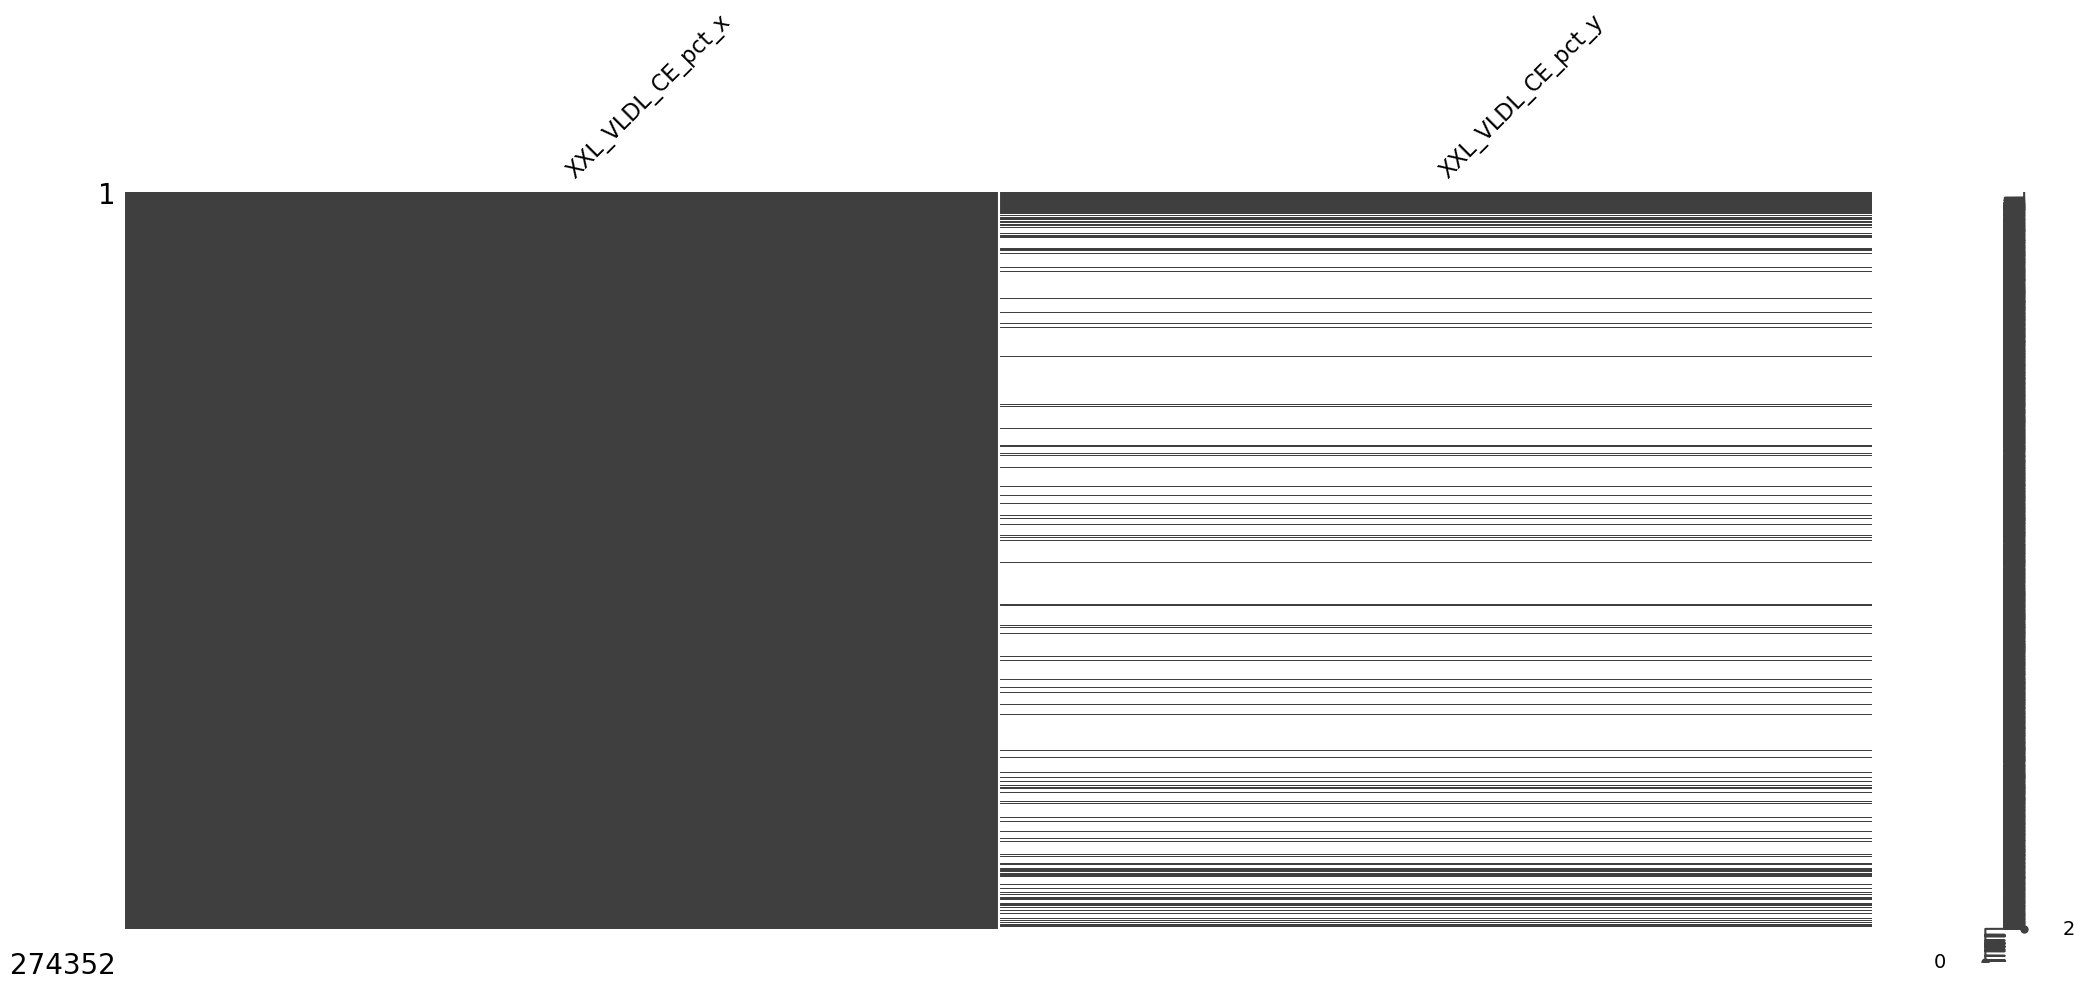

In [12]:
XXL_VLDL_cols = [col for col in met_qc_df.columns if col.startswith('XXL_VLDL')]
XXL_VLDL_df = met_qc_df[XXL_VLDL_cols]

msno.matrix(XXL_VLDL_df[['XXL_VLDL_CE_pct_x', 'XXL_VLDL_CE_pct_y']].sort_values('XXL_VLDL_CE_pct_x'))

In [13]:
# Counting the number of missing and non-missing QC flags in the missing and non-missing metabolite values
XXL_VLDL_CE_pct = XXL_VLDL_df[['XXL_VLDL_CE_pct_x', 'XXL_VLDL_CE_pct_y']]

XXL_VLDL_CE_pct['missing_met'] = np.where(XXL_VLDL_CE_pct['XXL_VLDL_CE_pct_x'].isna(), 'missing', 'not missing')
XXL_VLDL_CE_pct['missing_qc'] = np.where(XXL_VLDL_CE_pct['XXL_VLDL_CE_pct_y'].isna(), 'missing', 'not missing')

XXL_VLDL_CE_pct[['missing_met', 'missing_qc']].groupby(['missing_met', 'missing_qc'])['missing_qc'].count()

/mnt/scratch/tmp/wb_agarham/ipykernel_32118/95151821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XXL_VLDL_CE_pct['missing_met'] = np.where(XXL_VLDL_CE_pct['XXL_VLDL_CE_pct_x'].isna(), 'missing', 'not missing')
/mnt/scratch/tmp/wb_agarham/ipykernel_32118/95151821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XXL_VLDL_CE_pct['missing_qc'] = np.where(XXL_VLDL_CE_pct['XXL_VLDL_CE_pct_y'].isna(), 'missing', 'not missing')


missing_met  missing_qc 
missing      missing         11783
             not missing        18
not missing  missing        220127
             not missing     42424
Name: missing_qc, dtype: int64

<Axes: xlabel='missing_met'>

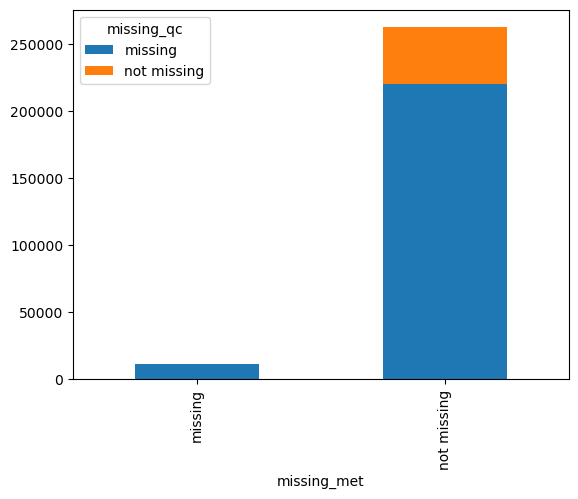

In [14]:
# Visualizing the number of missing and non-missing QC flags in the missing and non-missing metabolite values
XXL_VLDL_CE_pct.groupby(['missing_met', 'missing_qc']).size().unstack().plot(kind='bar', stacked=True)

## Check the non-missing values with LoQ flag

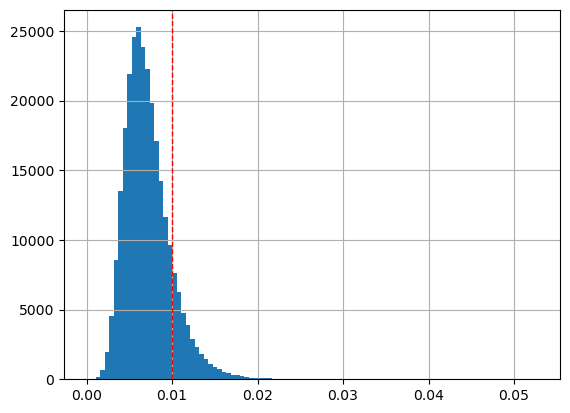

In [16]:
# Check distribution (non-missing LoQ flag 86,5%)
ax = met_df['XL_HDL_TG'].hist(bins=100)
ax.axvline(x=0.01, color='red', linestyle='dashed', linewidth=1)
ax.figure.show()

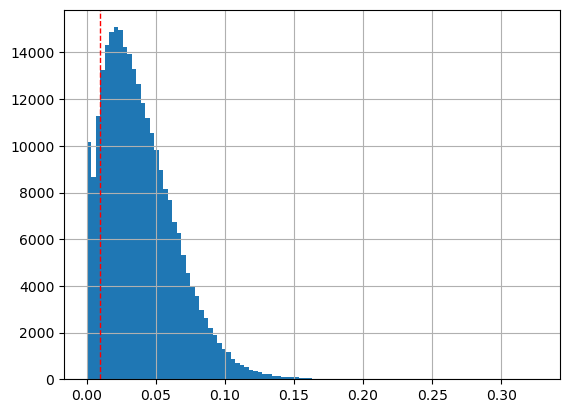

In [15]:
# Check distribution (non-missing LoQ flag 11,24%)
ax = met_df['XL_VLDL_PL'].hist(bins=100)
ax.axvline(x=0.01, color='red', linestyle='dashed', linewidth=1)
ax.figure.show()

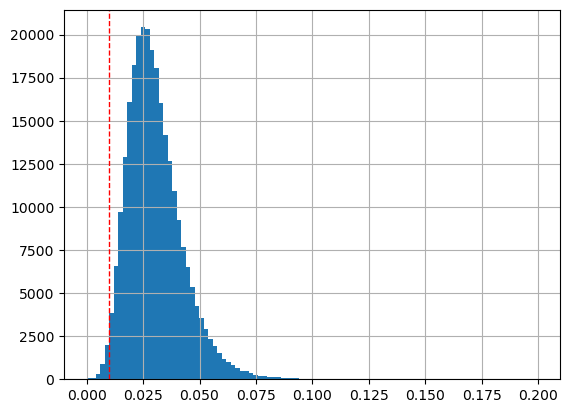

In [17]:
# Check distribution (non-missing LoQ flag 1,22%)
ax = met_df['L_HDL_TG'].hist(bins=100)
ax.axvline(x=0.01, color='red', linestyle='dashed', linewidth=1)
ax.figure.show()

## General visualisation of the missing values distribution

Axes(0.125,0.11;0.698618x0.77)
Axes(0.125,0.11;0.775x0.77)


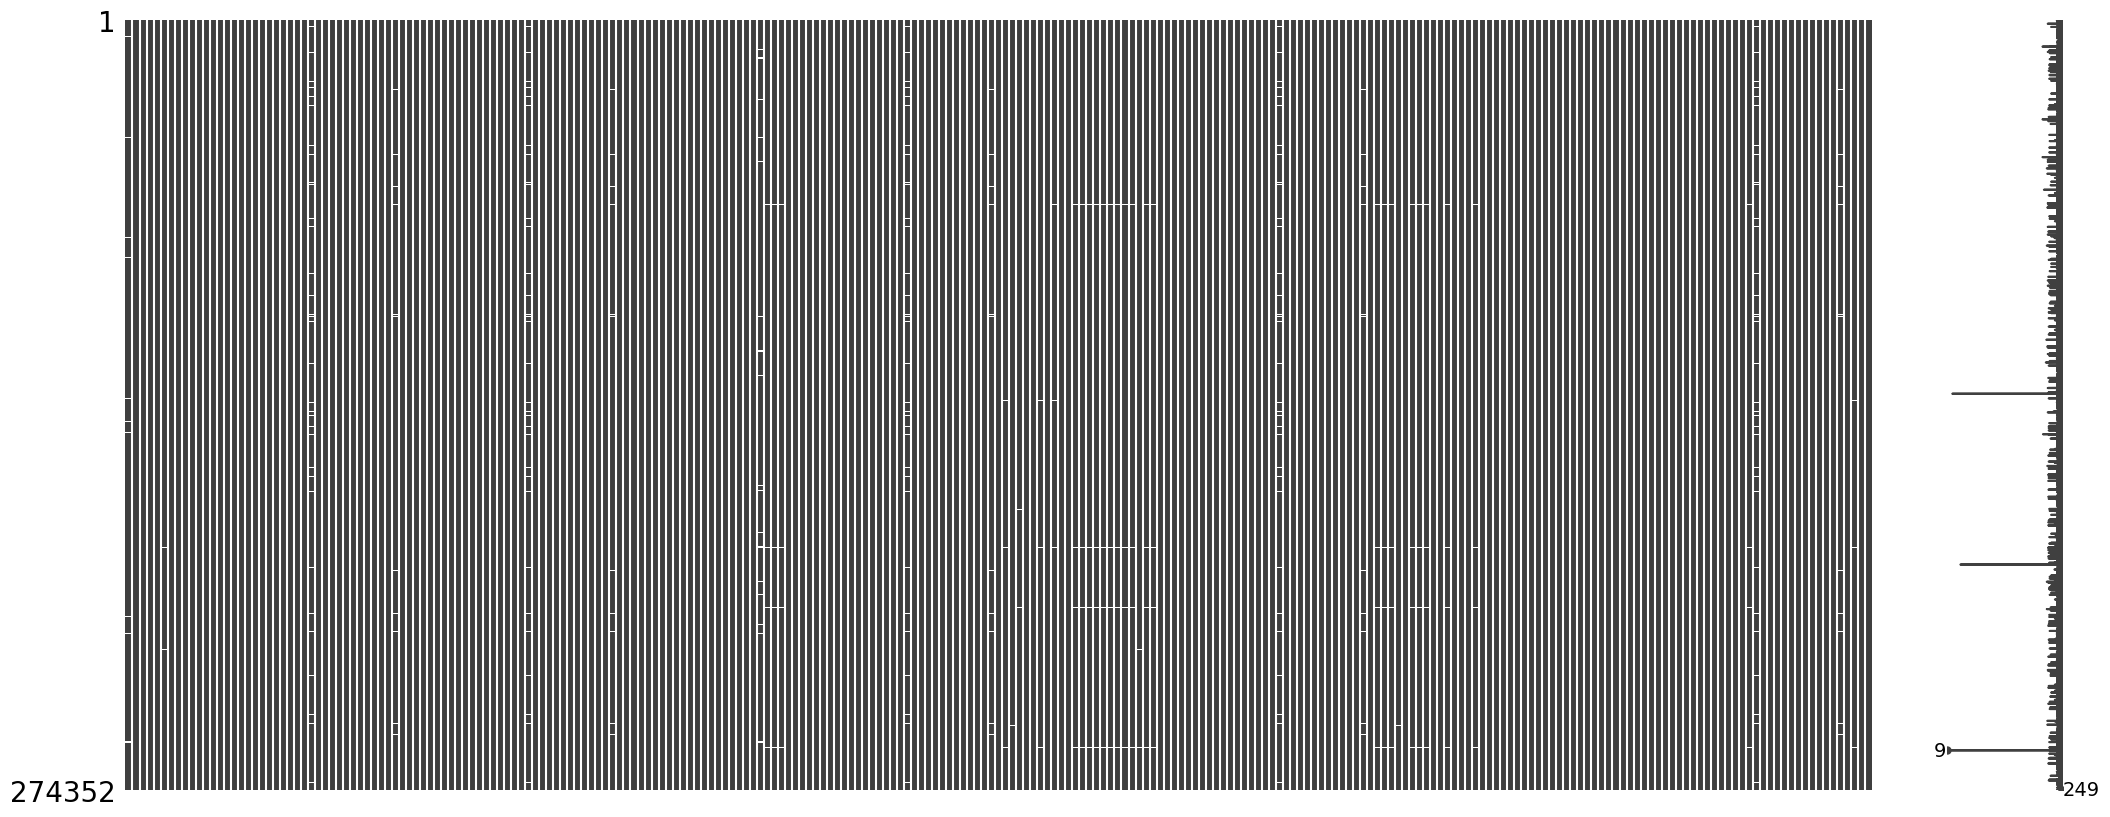

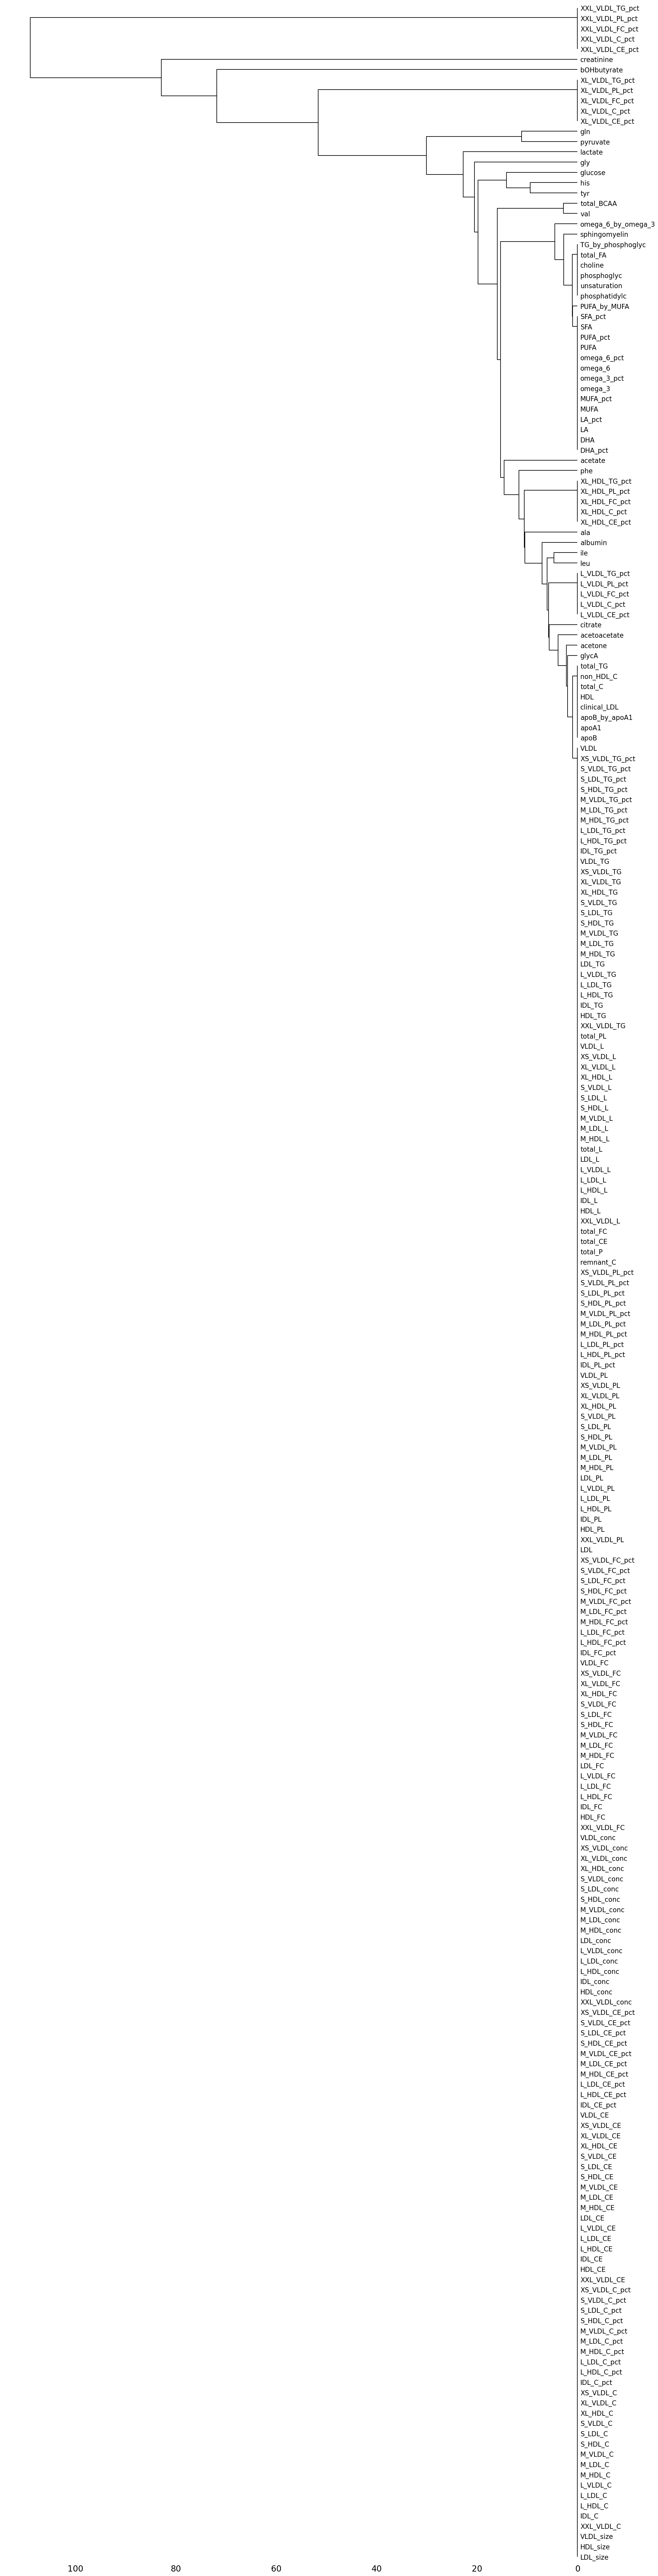

In [18]:
print(msno.matrix(met_miss))
print(msno.dendrogram(met_miss))

<Axes: >

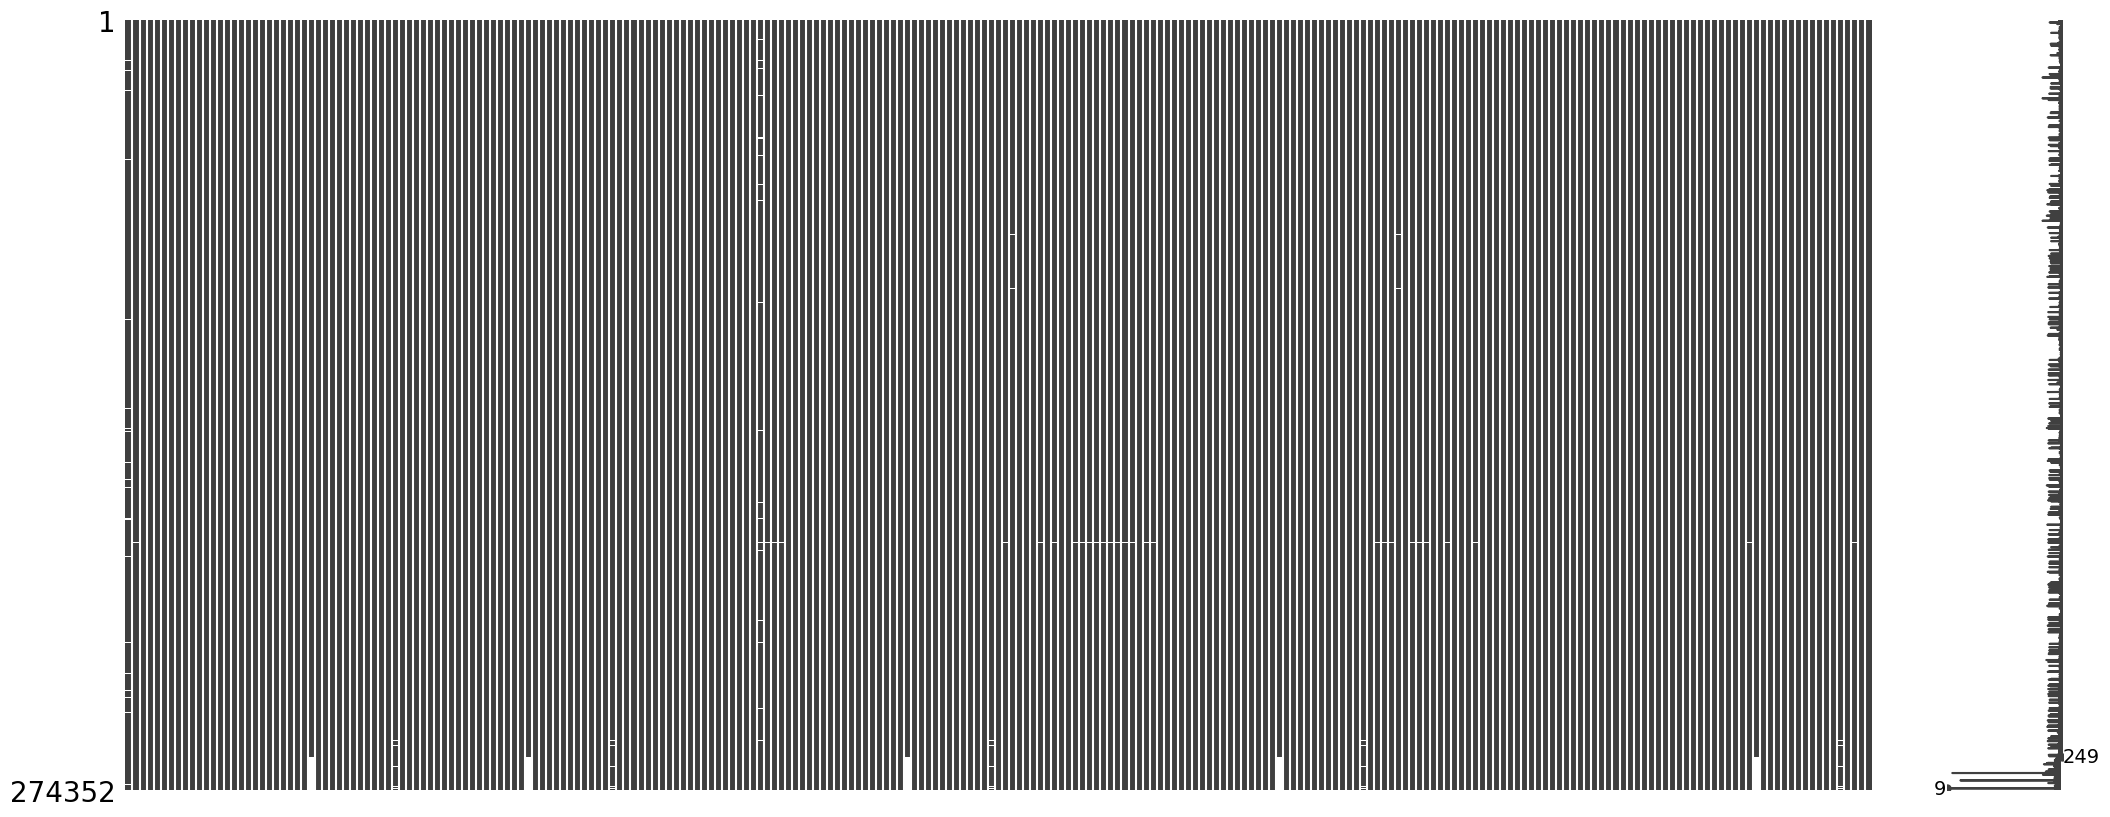

In [19]:
sorted = met_miss.sort_values('XXL_VLDL_TG_pct')
msno.matrix(sorted)

<Axes: >

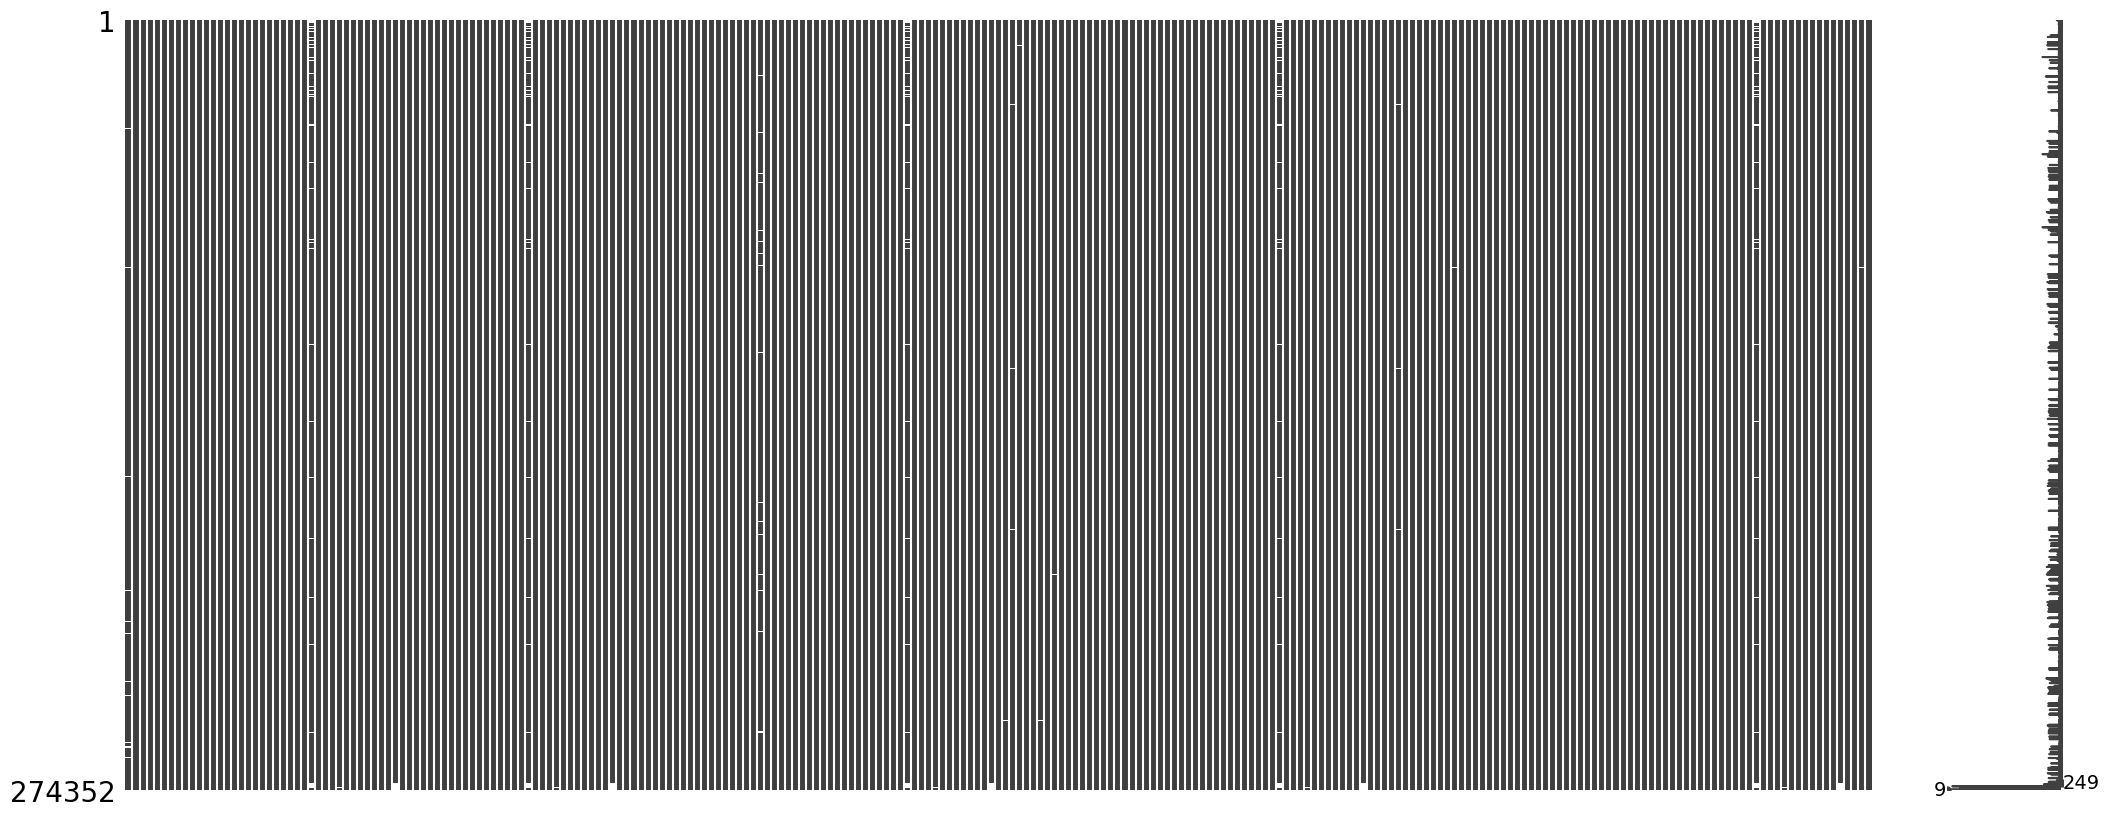

In [20]:
sorted = met_miss.sort_values('XL_VLDL_TG_pct')
msno.matrix(sorted)

<Axes: >

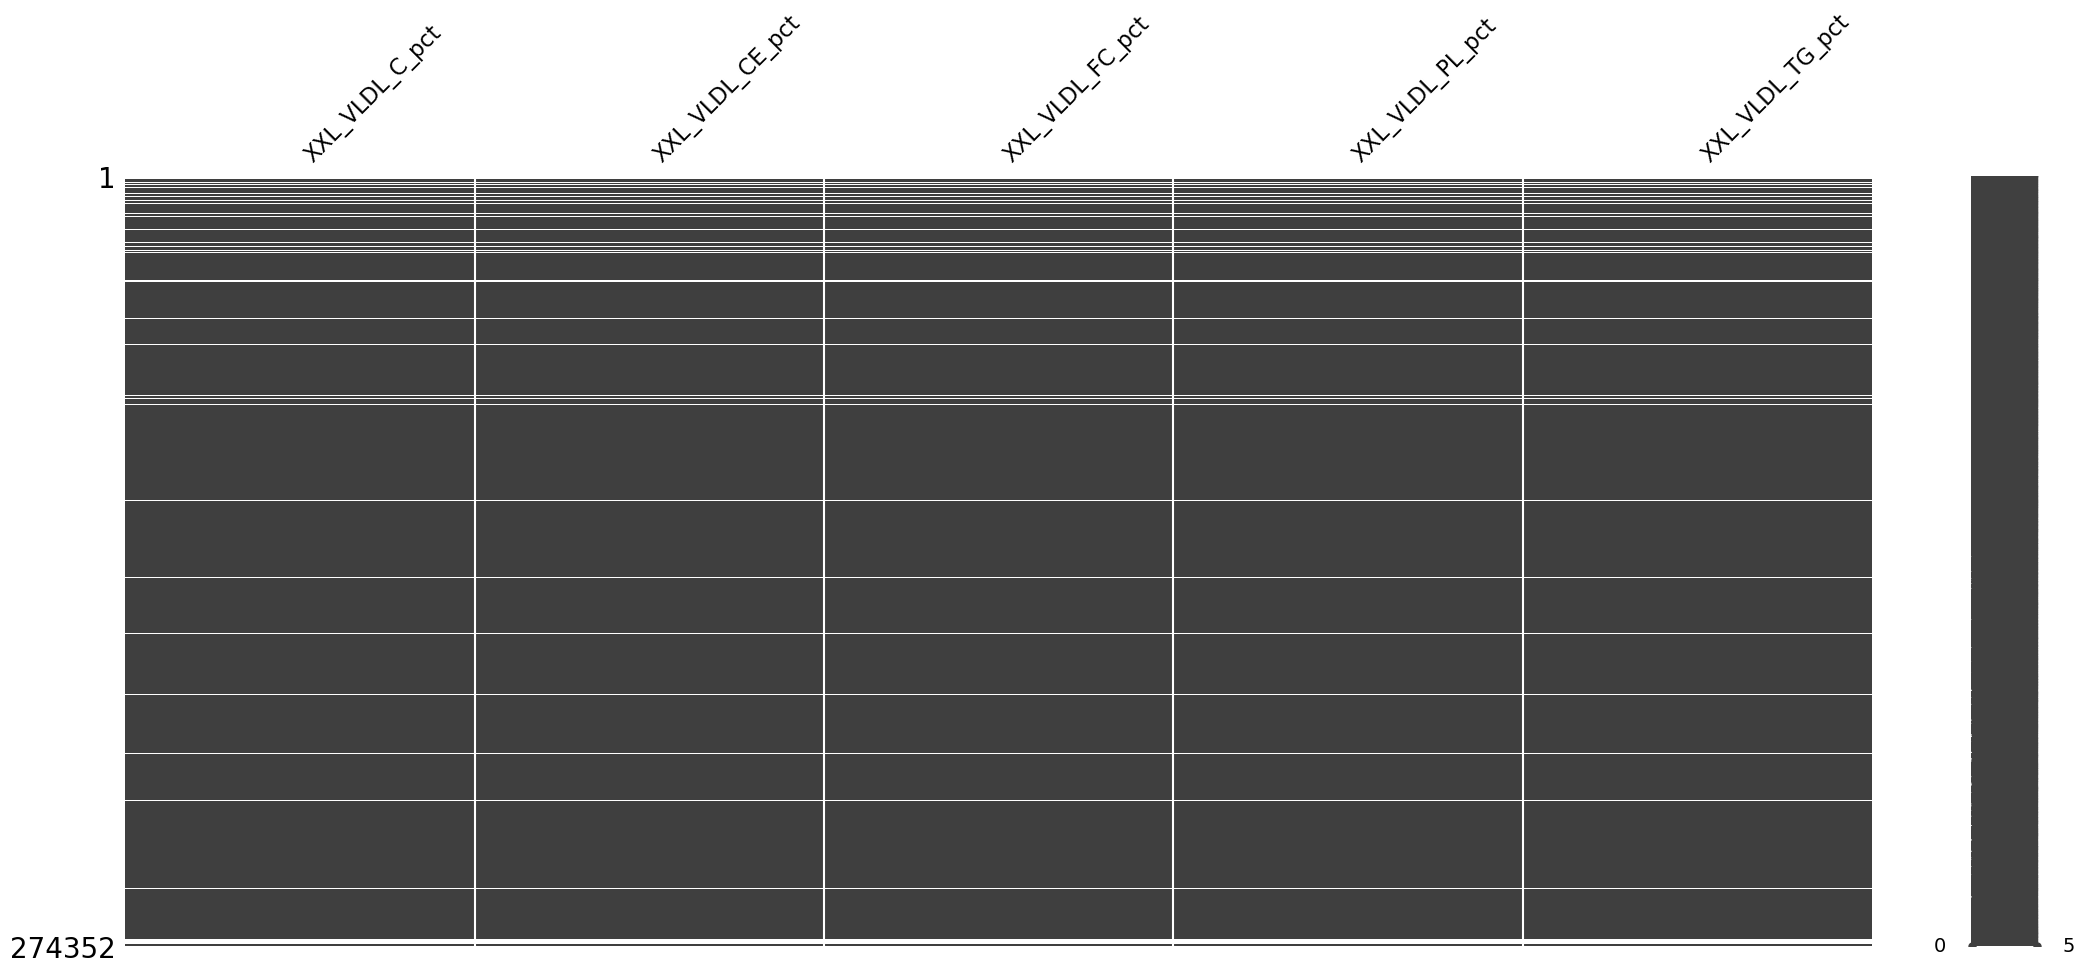

In [21]:
xxl_vldl_pct_cols = [col for col in sorted.columns if col.startswith('XXL_VLDL') & col.endswith('pct')]
msno.matrix(sorted[xxl_vldl_pct_cols])

<Axes: >

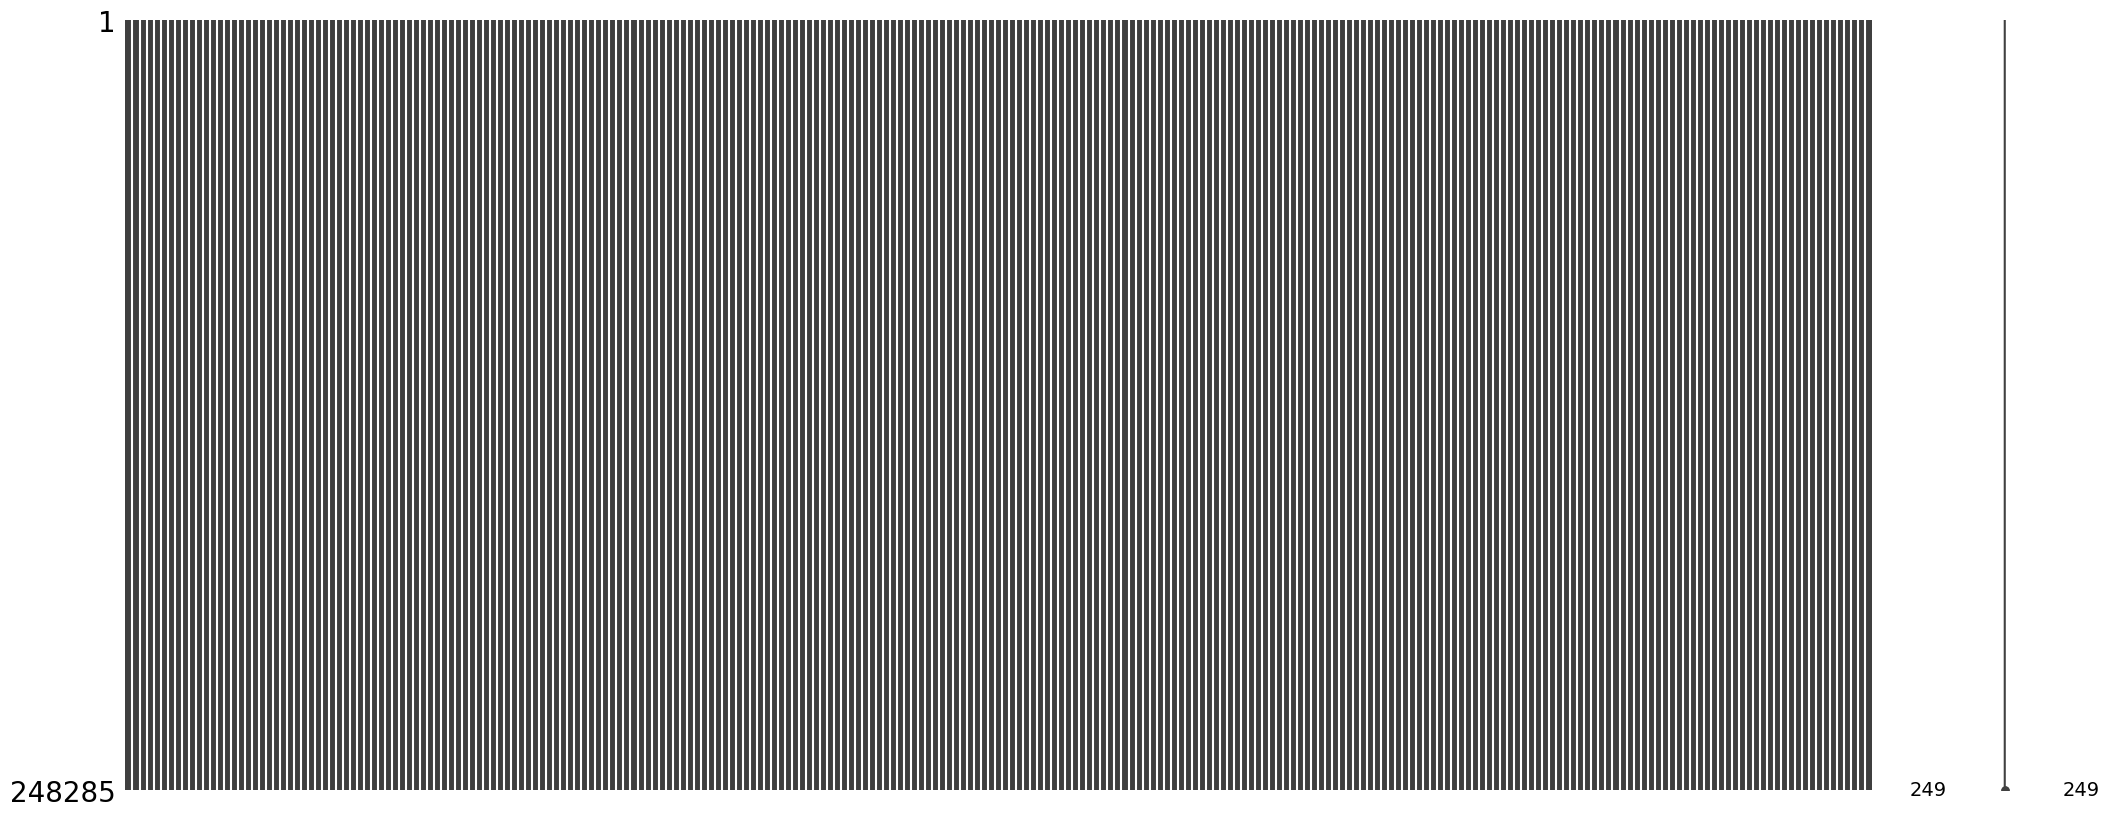

In [22]:
complete_met = met_miss.dropna()
msno.matrix(complete_met)